#  Bank Note Authentication Analysis

    Whenever we go to the bank to deposit some cash money, the cashier places banknotes in a machine which tells whether a banknote is real or not. This is a classification problem where we are given some input data and we have to classify the input into one of the several predefined categories. Rule-based as well as statistical techniques are commonly used for solving classification problems. Machine learning algorithms fall in the category of statistical techniques.

    In this notebook, will explain the process of building a banknote authentication system using machine learning algorithms. After reading this article, you will be able to understand how classification systems are built using machine learning algorithms.

In [105]:
import numpy as np
from sklearn import metrics

In [1]:
#Importing pyforest library
import warnings

warnings.filterwarnings('ignore')


In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14609 sha256=7d1725c70be38b9289a1cf7afc44c3d29f86eec25be7d03001b89882b28d6460
  Stored in directory: c:\users\shara\appdata\local\pip\cache\wheels\21\2d\19\8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [3]:
from pyforest import *

### Loding BankNote_Authentication(UCI) dataset from kaggle

In [7]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.shape

(1372, 5)

In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

## Exploratory Data Analysis

In [65]:
# Summary
def summary(df):
    df = {
     'Count' : df.shape[0],
     'NA values' : df.isna().sum(),
     '% NA' : round((df.isna().sum()/df.shape[0]) * 100, 2),
     'Unique' : df.nunique(),
     'Dtype' : df.dtypes,
     'min' : round(df.min(),2),
     '25%' : round(df.quantile(.25),2),
     '50%' : round(df.quantile(.50),2),
     'mean' : round(df.mean(),2),
     '75%' : round(df.quantile(.75),2),   
     'max' : round(df.max(),2)
    } 
    return(pd.DataFrame(df))

print('Shape is :', df.shape)
summary(df)

Shape is : (1372, 5)


<IPython.core.display.Javascript object>

,Count,NA values,% NA,Unique,Dtype,min,25%,50%,mean,75%,max
variance,1372,0,0.0,1338,float64,-7.04,-1.77,0.50,0.43,2.82,6.82
skewness,1372,0,0.0,1256,float64,-13.77,-1.71,2.32,1.92,6.81,12.95
curtosis,1372,0,0.0,1270,float64,-5.29,-1.57,0.62,1.40,3.18,17.93
entropy,1372,0,0.0,1156,float64,-8.55,-2.41,-0.59,-1.19,0.39,2.45
class,1372,0,0.0,2,int64,0.00,0.00,0.00,0.44,1.00,1.00


#### There is no need of EDA process because data is already balanced and no missing value

In [12]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

### Visualization

<IPython.core.display.Javascript object>

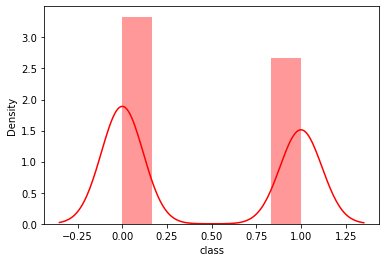

In [13]:
# Dist Plot Visualization
sns.distplot(df['class'],color='red',kde=True);

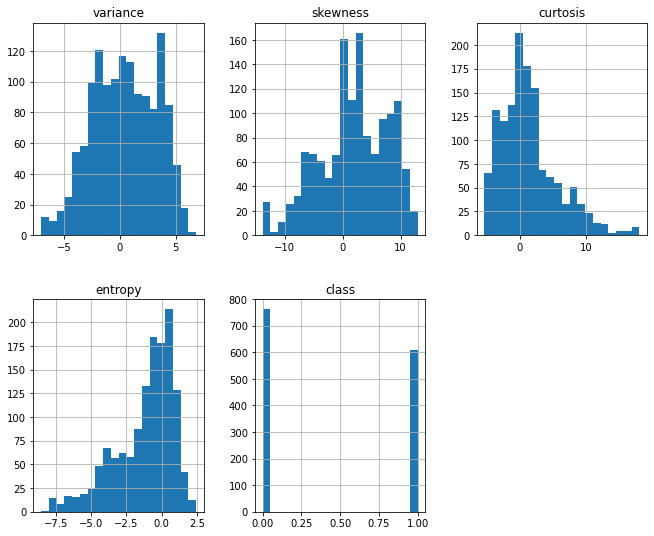

In [14]:
# Plotting Histogram

#df.hist(figsize = (10,10))
#plt.show()

df.hist(bins=20,figsize=(11,9),layout=(2,3));

<IPython.core.display.Javascript object>

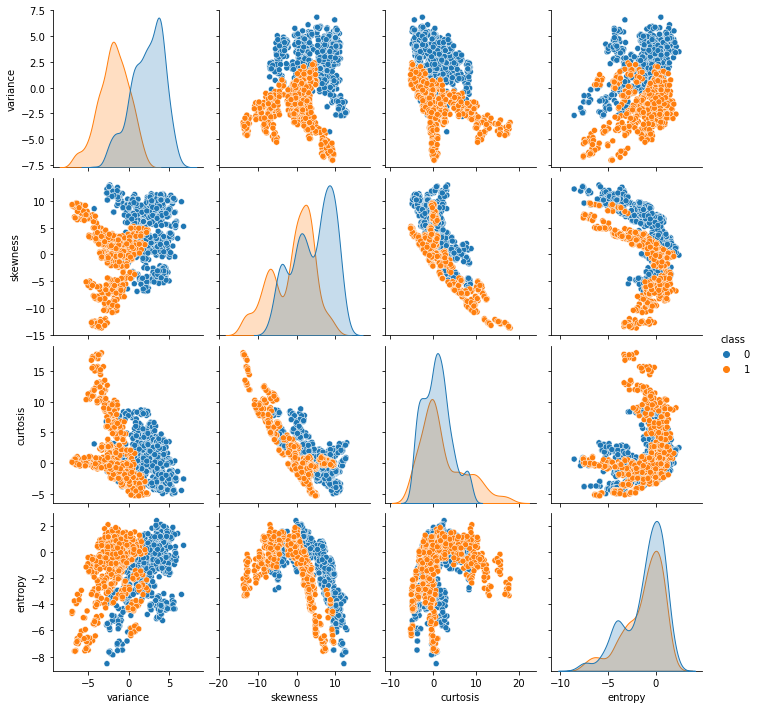

In [15]:
# Pairplot Visualization
sns.pairplot(df,hue='class');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

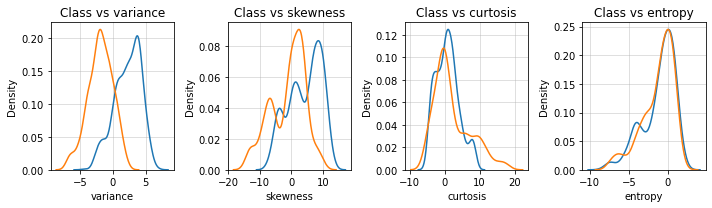

In [57]:
col_names = df.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note')
    sns.kdeplot(df[col][df['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

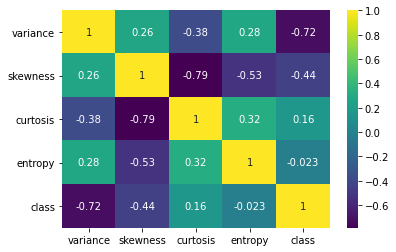

In [16]:
#Heatmap creation
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [17]:
# Independent Variables
X = df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [18]:
# Dependent Variable
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

###  From Above Diagram we can see their is a multicolliniraty between curtosis and skewness but can be ignored

In [72]:
columns = list(df.columns)
columns.remove('class')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

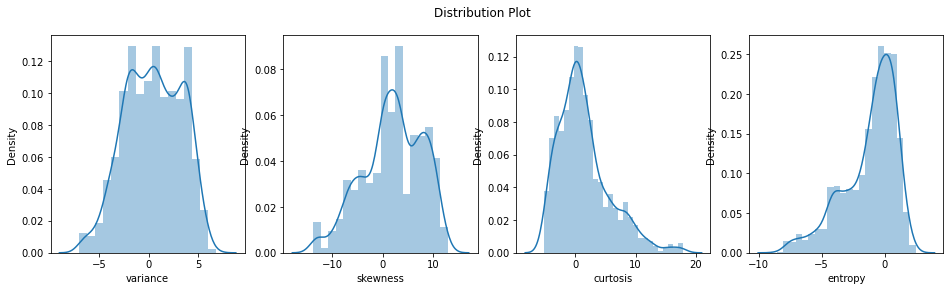

In [73]:
fig, ax = plt.subplots(ncols = 4, figsize=(16, 4))
fig.suptitle("Distribution Plot")

for index, column in enumerate(columns):
    sns.distplot(df[column], ax=ax[index])

Conclution From Above Diagram
Their may be outliers in entropy and curtosis column
Data is not normalized
since we gonna use trees in our model above things dont effect model much

In [124]:
#Visual Representation of the Data¶
#In the subplots below, each plot is graphed with the corresponding attribute of the banknote image in the graph title and its binary classification. First, we start off with boxplots to see how the data differs when the banknote is real and fake.
#df.boxplot('Variance','Class')
#df.boxplot('Skewness','Class')
#df.boxplot('Curtosis','Class')
#df.boxplot('Entropy', 'Class')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

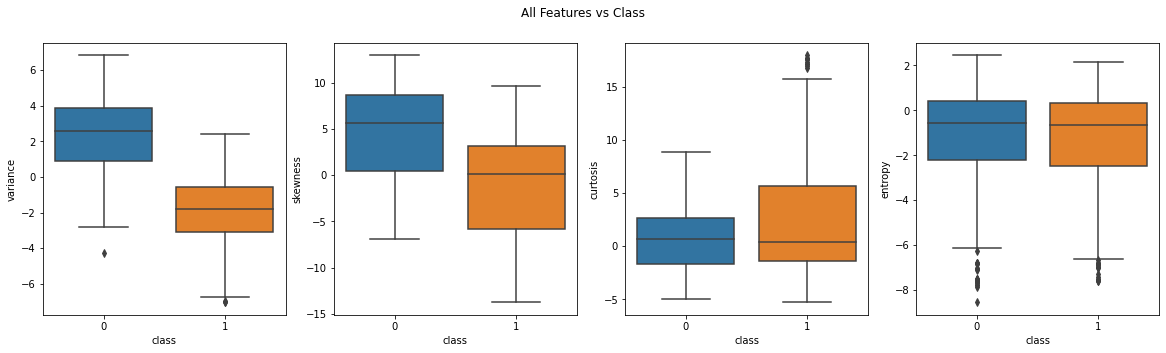

In [74]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("All Features vs Class")

for index, column in enumerate(columns):
    sns.boxplot(x="class", y=column, data=df, ax=ax[index])

### Splitting Data into train & test

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [20]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1097, 4)
y_train: (1097,)
X_test: (275, 4)
y_test: (275,)


In [21]:
## Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


X_test:
 [[-1.40564511 -0.03629527 -0.25946279 -0.55356298]
 [ 0.27456924  0.39719812  0.19050204  0.69982149]
 [-1.56677623 -1.70567084  2.36049857 -0.08188265]
 ...
 [ 0.33303672  0.90277959 -0.894603    0.10774845]
 [ 0.24291663 -0.00314587 -0.98169159  0.65423293]
 [ 0.44734548  0.89770987 -0.5083209  -0.56573811]]


##  Build model

### 1) Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [25]:
classifire = LogisticRegression(solver='liblinear',random_state=1)

classifire.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",accuracies)

Accuracies:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [26]:
print("Mean Accuracies: ",accuracies.mean())

Mean Accuracies:  0.9835863219349459


In [27]:
classifire_pred = classifire.predict(X_test)
classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

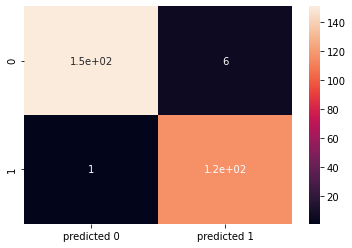

In [28]:
#confusion matrix Heat Map
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

#### 2) Support Vector Machine

In [29]:
#import Support Vector Classifier
from sklearn.svm import SVC

In [30]:
svm_classifire = SVC(kernel="linear")

svm_classifire.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [31]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [32]:
svm_classifire_pred = svm_classifire.predict(X_test)
svm_classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

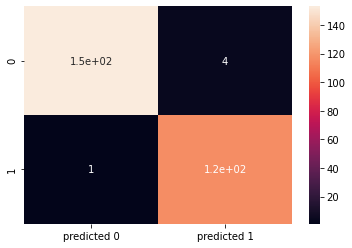

In [33]:
cm = metrics.confusion_matrix(y_test,svm_classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 3) Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [36]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [37]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

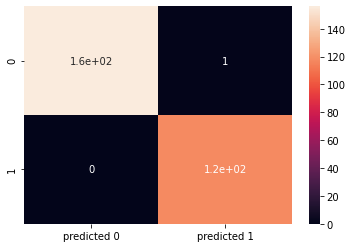

In [38]:
cm = metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 4) KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [40]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [41]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [42]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [43]:
KNN_pred = KNN.predict(X_test)

In [44]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",knn_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [45]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9972727272727273


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

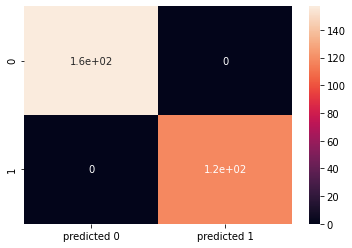

In [46]:
cm = metrics.confusion_matrix(y_test,KNN_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### KNearest Neighbors Function base Algorithm...no Need of training

In [112]:
from sklearn.preprocessing import binarize
# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

def model_validation(model,X_test,y_test,thr = 0.5) :
    
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred = binarize(y_pred_prob.reshape(1,-1), thr)[0]
    
   # cnf_matrix = cm(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test,KNN_pred,labels=[0,1])
    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')

    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.subplot(1,2,2)
    sns.lineplot(fpr, tpr)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    
    print('Classification Report :')
    print('===' * 20)
    print(classification_report(y_test, y_pred))

    score = tpr - fpr
    opt_threshold = sorted(zip(score,threshold))[-1][1]
    print('='*20)
    print('Area Under Curve', roc_auc_score(y_test,y_pred))
    print('Accuracy', accuracy_score(y_test,y_pred))
    print('Optimal Threshold : ',opt_threshold)
    print('='*20)

In [113]:
KNeighborsClassifier()

KNeighborsClassifier()

In [114]:
#Hyper Parameter Tuning
param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [115]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [116]:
final_model = grid.best_estimator_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

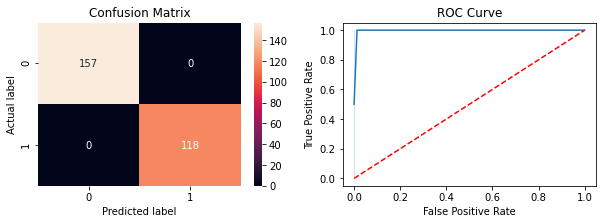

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Area Under Curve 1.0
Accuracy 1.0
Optimal Threshold :  1.0


In [117]:
model_validation(final_model, X_test, y_test)

### 5) Multilayer Preception (Neural Network)

In [47]:
from sklearn.neural_network import MLPClassifier

In [50]:
multi_class = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=5000, alpha=0.0001, solver='sgd',verbose=10,random_state= 21,tol=0.000000001)

In [51]:
multi_class.fit(X_train, y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

Iteration 280, loss = 0.03830598
Iteration 281, loss = 0.03815187
Iteration 282, loss = 0.03800226
Iteration 283, loss = 0.03785460
Iteration 284, loss = 0.03770229
Iteration 285, loss = 0.03756117
Iteration 286, loss = 0.03741211
Iteration 287, loss = 0.03726985
Iteration 288, loss = 0.03711690
Iteration 289, loss = 0.03697685
Iteration 290, loss = 0.03683561
Iteration 291, loss = 0.03670088
Iteration 292, loss = 0.03655956
Iteration 293, loss = 0.03642230
Iteration 294, loss = 0.03628931
Iteration 295, loss = 0.03615684
Iteration 296, loss = 0.03602420
Iteration 297, loss = 0.03589386
Iteration 298, loss = 0.03576305
Iteration 299, loss = 0.03563450
Iteration 300, loss = 0.03550705
Iteration 301, loss = 0.03537878
Iteration 302, loss = 0.03525408
Iteration 303, loss = 0.03513394
Iteration 304, loss = 0.03500536
Iteration 305, loss = 0.03488854
Iteration 306, loss = 0.03476340
Iteration 307, loss = 0.03464008
Iteration 308, loss = 0.03451699
Iteration 309, loss = 0.03439868
Iteration 

Iteration 538, loss = 0.01943905
Iteration 539, loss = 0.01940010
Iteration 540, loss = 0.01936248
Iteration 541, loss = 0.01932282
Iteration 542, loss = 0.01928521
Iteration 543, loss = 0.01924830
Iteration 544, loss = 0.01921152
Iteration 545, loss = 0.01917545
Iteration 546, loss = 0.01913794
Iteration 547, loss = 0.01910061
Iteration 548, loss = 0.01906512
Iteration 549, loss = 0.01902648
Iteration 550, loss = 0.01898773
Iteration 551, loss = 0.01895389
Iteration 552, loss = 0.01891872
Iteration 553, loss = 0.01887788
Iteration 554, loss = 0.01884507
Iteration 555, loss = 0.01880825
Iteration 556, loss = 0.01877205
Iteration 557, loss = 0.01873509
Iteration 558, loss = 0.01870421
Iteration 559, loss = 0.01866518
Iteration 560, loss = 0.01862787
Iteration 561, loss = 0.01859535
Iteration 562, loss = 0.01855807
Iteration 563, loss = 0.01852122
Iteration 564, loss = 0.01848908
Iteration 565, loss = 0.01845371
Iteration 566, loss = 0.01841829
Iteration 567, loss = 0.01838373
Iteration 

Iteration 796, loss = 0.01252558
Iteration 797, loss = 0.01251147
Iteration 798, loss = 0.01248660
Iteration 799, loss = 0.01246858
Iteration 800, loss = 0.01244879
Iteration 801, loss = 0.01243131
Iteration 802, loss = 0.01241337
Iteration 803, loss = 0.01239353
Iteration 804, loss = 0.01237527
Iteration 805, loss = 0.01235588
Iteration 806, loss = 0.01233859
Iteration 807, loss = 0.01232026
Iteration 808, loss = 0.01230247
Iteration 809, loss = 0.01228254
Iteration 810, loss = 0.01226561
Iteration 811, loss = 0.01224681
Iteration 812, loss = 0.01222709
Iteration 813, loss = 0.01220834
Iteration 814, loss = 0.01219005
Iteration 815, loss = 0.01217365
Iteration 816, loss = 0.01215432
Iteration 817, loss = 0.01213687
Iteration 818, loss = 0.01212102
Iteration 819, loss = 0.01210201
Iteration 820, loss = 0.01208252
Iteration 821, loss = 0.01206462
Iteration 822, loss = 0.01204643
Iteration 823, loss = 0.01202861
Iteration 824, loss = 0.01201228
Iteration 825, loss = 0.01199393
Iteration 

Iteration 1053, loss = 0.00879326
Iteration 1054, loss = 0.00878198
Iteration 1055, loss = 0.00877177
Iteration 1056, loss = 0.00876227
Iteration 1057, loss = 0.00874942
Iteration 1058, loss = 0.00873823
Iteration 1059, loss = 0.00872624
Iteration 1060, loss = 0.00871575
Iteration 1061, loss = 0.00870453
Iteration 1062, loss = 0.00869407
Iteration 1063, loss = 0.00868274
Iteration 1064, loss = 0.00867285
Iteration 1065, loss = 0.00866130
Iteration 1066, loss = 0.00865100
Iteration 1067, loss = 0.00864025
Iteration 1068, loss = 0.00863028
Iteration 1069, loss = 0.00861950
Iteration 1070, loss = 0.00860898
Iteration 1071, loss = 0.00859741
Iteration 1072, loss = 0.00858985
Iteration 1073, loss = 0.00857677
Iteration 1074, loss = 0.00856511
Iteration 1075, loss = 0.00855438
Iteration 1076, loss = 0.00854569
Iteration 1077, loss = 0.00853412
Iteration 1078, loss = 0.00852391
Iteration 1079, loss = 0.00851207
Iteration 1080, loss = 0.00850090
Iteration 1081, loss = 0.00849143
Iteration 1082

Iteration 1303, loss = 0.00656963
Iteration 1304, loss = 0.00656319
Iteration 1305, loss = 0.00655526
Iteration 1306, loss = 0.00654930
Iteration 1307, loss = 0.00654094
Iteration 1308, loss = 0.00653391
Iteration 1309, loss = 0.00652705
Iteration 1310, loss = 0.00652040
Iteration 1311, loss = 0.00651297
Iteration 1312, loss = 0.00650560
Iteration 1313, loss = 0.00649912
Iteration 1314, loss = 0.00649265
Iteration 1315, loss = 0.00648556
Iteration 1316, loss = 0.00647924
Iteration 1317, loss = 0.00647255
Iteration 1318, loss = 0.00646488
Iteration 1319, loss = 0.00645832
Iteration 1320, loss = 0.00645139
Iteration 1321, loss = 0.00644479
Iteration 1322, loss = 0.00643720
Iteration 1323, loss = 0.00643101
Iteration 1324, loss = 0.00642397
Iteration 1325, loss = 0.00641655
Iteration 1326, loss = 0.00641045
Iteration 1327, loss = 0.00640309
Iteration 1328, loss = 0.00639641
Iteration 1329, loss = 0.00638980
Iteration 1330, loss = 0.00638271
Iteration 1331, loss = 0.00637562
Iteration 1332

Iteration 1568, loss = 0.00508053
Iteration 1569, loss = 0.00507617
Iteration 1570, loss = 0.00507124
Iteration 1571, loss = 0.00506662
Iteration 1572, loss = 0.00506276
Iteration 1573, loss = 0.00505793
Iteration 1574, loss = 0.00505317
Iteration 1575, loss = 0.00504895
Iteration 1576, loss = 0.00504449
Iteration 1577, loss = 0.00504063
Iteration 1578, loss = 0.00503570
Iteration 1579, loss = 0.00503066
Iteration 1580, loss = 0.00502786
Iteration 1581, loss = 0.00502258
Iteration 1582, loss = 0.00501735
Iteration 1583, loss = 0.00501366
Iteration 1584, loss = 0.00500851
Iteration 1585, loss = 0.00500474
Iteration 1586, loss = 0.00500046
Iteration 1587, loss = 0.00499572
Iteration 1588, loss = 0.00499163
Iteration 1589, loss = 0.00498755
Iteration 1590, loss = 0.00498299
Iteration 1591, loss = 0.00497815
Iteration 1592, loss = 0.00497371
Iteration 1593, loss = 0.00497008
Iteration 1594, loss = 0.00496557
Iteration 1595, loss = 0.00496126
Iteration 1596, loss = 0.00495671
Iteration 1597

Iteration 1834, loss = 0.00409121
Iteration 1835, loss = 0.00408796
Iteration 1836, loss = 0.00408482
Iteration 1837, loss = 0.00408194
Iteration 1838, loss = 0.00407864
Iteration 1839, loss = 0.00407581
Iteration 1840, loss = 0.00407245
Iteration 1841, loss = 0.00406983
Iteration 1842, loss = 0.00406628
Iteration 1843, loss = 0.00406366
Iteration 1844, loss = 0.00406050
Iteration 1845, loss = 0.00405753
Iteration 1846, loss = 0.00405429
Iteration 1847, loss = 0.00405142
Iteration 1848, loss = 0.00404890
Iteration 1849, loss = 0.00404528
Iteration 1850, loss = 0.00404284
Iteration 1851, loss = 0.00403978
Iteration 1852, loss = 0.00403654
Iteration 1853, loss = 0.00403347
Iteration 1854, loss = 0.00403069
Iteration 1855, loss = 0.00402772
Iteration 1856, loss = 0.00402475
Iteration 1857, loss = 0.00402204
Iteration 1858, loss = 0.00401884
Iteration 1859, loss = 0.00401602
Iteration 1860, loss = 0.00401313
Iteration 1861, loss = 0.00400996
Iteration 1862, loss = 0.00400724
Iteration 1863

Iteration 2098, loss = 0.00340078
Iteration 2099, loss = 0.00339841
Iteration 2100, loss = 0.00339639
Iteration 2101, loss = 0.00339415
Iteration 2102, loss = 0.00339193
Iteration 2103, loss = 0.00338969
Iteration 2104, loss = 0.00338737
Iteration 2105, loss = 0.00338515
Iteration 2106, loss = 0.00338290
Iteration 2107, loss = 0.00338083
Iteration 2108, loss = 0.00337872
Iteration 2109, loss = 0.00337641
Iteration 2110, loss = 0.00337437
Iteration 2111, loss = 0.00337221
Iteration 2112, loss = 0.00337010
Iteration 2113, loss = 0.00336779
Iteration 2114, loss = 0.00336587
Iteration 2115, loss = 0.00336367
Iteration 2116, loss = 0.00336151
Iteration 2117, loss = 0.00335891
Iteration 2118, loss = 0.00335728
Iteration 2119, loss = 0.00335492
Iteration 2120, loss = 0.00335239
Iteration 2121, loss = 0.00335037
Iteration 2122, loss = 0.00334821
Iteration 2123, loss = 0.00334612
Iteration 2124, loss = 0.00334397
Iteration 2125, loss = 0.00334165
Iteration 2126, loss = 0.00333941
Iteration 2127

Iteration 2340, loss = 0.00292549
Iteration 2341, loss = 0.00292405
Iteration 2342, loss = 0.00292211
Iteration 2343, loss = 0.00292047
Iteration 2344, loss = 0.00291879
Iteration 2345, loss = 0.00291714
Iteration 2346, loss = 0.00291563
Iteration 2347, loss = 0.00291373
Iteration 2348, loss = 0.00291188
Iteration 2349, loss = 0.00291043
Iteration 2350, loss = 0.00290874
Iteration 2351, loss = 0.00290690
Iteration 2352, loss = 0.00290524
Iteration 2353, loss = 0.00290350
Iteration 2354, loss = 0.00290181
Iteration 2355, loss = 0.00290008
Iteration 2356, loss = 0.00289838
Iteration 2357, loss = 0.00289674
Iteration 2358, loss = 0.00289542
Iteration 2359, loss = 0.00289348
Iteration 2360, loss = 0.00289204
Iteration 2361, loss = 0.00289035
Iteration 2362, loss = 0.00288857
Iteration 2363, loss = 0.00288695
Iteration 2364, loss = 0.00288528
Iteration 2365, loss = 0.00288343
Iteration 2366, loss = 0.00288189
Iteration 2367, loss = 0.00288043
Iteration 2368, loss = 0.00287901
Iteration 2369

Iteration 2584, loss = 0.00256437
Iteration 2585, loss = 0.00256267
Iteration 2586, loss = 0.00256150
Iteration 2587, loss = 0.00256019
Iteration 2588, loss = 0.00255898
Iteration 2589, loss = 0.00255765
Iteration 2590, loss = 0.00255641
Iteration 2591, loss = 0.00255520
Iteration 2592, loss = 0.00255391
Iteration 2593, loss = 0.00255258
Iteration 2594, loss = 0.00255120
Iteration 2595, loss = 0.00254988
Iteration 2596, loss = 0.00254869
Iteration 2597, loss = 0.00254744
Iteration 2598, loss = 0.00254607
Iteration 2599, loss = 0.00254471
Iteration 2600, loss = 0.00254356
Iteration 2601, loss = 0.00254211
Iteration 2602, loss = 0.00254078
Iteration 2603, loss = 0.00253982
Iteration 2604, loss = 0.00253829
Iteration 2605, loss = 0.00253707
Iteration 2606, loss = 0.00253581
Iteration 2607, loss = 0.00253456
Iteration 2608, loss = 0.00253334
Iteration 2609, loss = 0.00253194
Iteration 2610, loss = 0.00253068
Iteration 2611, loss = 0.00252945
Iteration 2612, loss = 0.00252831
Iteration 2613

Iteration 2850, loss = 0.00225329
Iteration 2851, loss = 0.00225210
Iteration 2852, loss = 0.00225113
Iteration 2853, loss = 0.00224995
Iteration 2854, loss = 0.00224911
Iteration 2855, loss = 0.00224783
Iteration 2856, loss = 0.00224692
Iteration 2857, loss = 0.00224583
Iteration 2858, loss = 0.00224489
Iteration 2859, loss = 0.00224400
Iteration 2860, loss = 0.00224303
Iteration 2861, loss = 0.00224214
Iteration 2862, loss = 0.00224093
Iteration 2863, loss = 0.00223972
Iteration 2864, loss = 0.00223870
Iteration 2865, loss = 0.00223762
Iteration 2866, loss = 0.00223668
Iteration 2867, loss = 0.00223559
Iteration 2868, loss = 0.00223448
Iteration 2869, loss = 0.00223363
Iteration 2870, loss = 0.00223260
Iteration 2871, loss = 0.00223147
Iteration 2872, loss = 0.00223039
Iteration 2873, loss = 0.00222933
Iteration 2874, loss = 0.00222850
Iteration 2875, loss = 0.00222727
Iteration 2876, loss = 0.00222634
Iteration 2877, loss = 0.00222552
Iteration 2878, loss = 0.00222422
Iteration 2879

Iteration 3096, loss = 0.00201883
Iteration 3097, loss = 0.00201812
Iteration 3098, loss = 0.00201717
Iteration 3099, loss = 0.00201629
Iteration 3100, loss = 0.00201553
Iteration 3101, loss = 0.00201455
Iteration 3102, loss = 0.00201379
Iteration 3103, loss = 0.00201306
Iteration 3104, loss = 0.00201205
Iteration 3105, loss = 0.00201130
Iteration 3106, loss = 0.00201045
Iteration 3107, loss = 0.00200962
Iteration 3108, loss = 0.00200867
Iteration 3109, loss = 0.00200790
Iteration 3110, loss = 0.00200719
Iteration 3111, loss = 0.00200616
Iteration 3112, loss = 0.00200545
Iteration 3113, loss = 0.00200451
Iteration 3114, loss = 0.00200366
Iteration 3115, loss = 0.00200293
Iteration 3116, loss = 0.00200202
Iteration 3117, loss = 0.00200124
Iteration 3118, loss = 0.00200041
Iteration 3119, loss = 0.00199951
Iteration 3120, loss = 0.00199873
Iteration 3121, loss = 0.00199790
Iteration 3122, loss = 0.00199696
Iteration 3123, loss = 0.00199620
Iteration 3124, loss = 0.00199549
Iteration 3125

Iteration 3349, loss = 0.00182063
Iteration 3350, loss = 0.00182001
Iteration 3351, loss = 0.00181923
Iteration 3352, loss = 0.00181842
Iteration 3353, loss = 0.00181774
Iteration 3354, loss = 0.00181714
Iteration 3355, loss = 0.00181637
Iteration 3356, loss = 0.00181575
Iteration 3357, loss = 0.00181498
Iteration 3358, loss = 0.00181423
Iteration 3359, loss = 0.00181359
Iteration 3360, loss = 0.00181280
Iteration 3361, loss = 0.00181207
Iteration 3362, loss = 0.00181140
Iteration 3363, loss = 0.00181064
Iteration 3364, loss = 0.00180998
Iteration 3365, loss = 0.00180917
Iteration 3366, loss = 0.00180858
Iteration 3367, loss = 0.00180777
Iteration 3368, loss = 0.00180714
Iteration 3369, loss = 0.00180639
Iteration 3370, loss = 0.00180567
Iteration 3371, loss = 0.00180494
Iteration 3372, loss = 0.00180430
Iteration 3373, loss = 0.00180358
Iteration 3374, loss = 0.00180289
Iteration 3375, loss = 0.00180220
Iteration 3376, loss = 0.00180165
Iteration 3377, loss = 0.00180078
Iteration 3378

Iteration 3594, loss = 0.00165931
Iteration 3595, loss = 0.00165870
Iteration 3596, loss = 0.00165806
Iteration 3597, loss = 0.00165745
Iteration 3598, loss = 0.00165685
Iteration 3599, loss = 0.00165619
Iteration 3600, loss = 0.00165568
Iteration 3601, loss = 0.00165505
Iteration 3602, loss = 0.00165443
Iteration 3603, loss = 0.00165391
Iteration 3604, loss = 0.00165325
Iteration 3605, loss = 0.00165265
Iteration 3606, loss = 0.00165203
Iteration 3607, loss = 0.00165170
Iteration 3608, loss = 0.00165084
Iteration 3609, loss = 0.00165030
Iteration 3610, loss = 0.00164965
Iteration 3611, loss = 0.00164908
Iteration 3612, loss = 0.00164854
Iteration 3613, loss = 0.00164786
Iteration 3614, loss = 0.00164733
Iteration 3615, loss = 0.00164669
Iteration 3616, loss = 0.00164609
Iteration 3617, loss = 0.00164548
Iteration 3618, loss = 0.00164506
Iteration 3619, loss = 0.00164430
Iteration 3620, loss = 0.00164371
Iteration 3621, loss = 0.00164313
Iteration 3622, loss = 0.00164245
Iteration 3623

Iteration 3871, loss = 0.00150546
Iteration 3872, loss = 0.00150503
Iteration 3873, loss = 0.00150445
Iteration 3874, loss = 0.00150393
Iteration 3875, loss = 0.00150340
Iteration 3876, loss = 0.00150292
Iteration 3877, loss = 0.00150244
Iteration 3878, loss = 0.00150185
Iteration 3879, loss = 0.00150147
Iteration 3880, loss = 0.00150097
Iteration 3881, loss = 0.00150043
Iteration 3882, loss = 0.00149991
Iteration 3883, loss = 0.00149940
Iteration 3884, loss = 0.00149895
Iteration 3885, loss = 0.00149840
Iteration 3886, loss = 0.00149797
Iteration 3887, loss = 0.00149743
Iteration 3888, loss = 0.00149690
Iteration 3889, loss = 0.00149642
Iteration 3890, loss = 0.00149591
Iteration 3891, loss = 0.00149540
Iteration 3892, loss = 0.00149494
Iteration 3893, loss = 0.00149443
Iteration 3894, loss = 0.00149390
Iteration 3895, loss = 0.00149342
Iteration 3896, loss = 0.00149290
Iteration 3897, loss = 0.00149243
Iteration 3898, loss = 0.00149190
Iteration 3899, loss = 0.00149139
Iteration 3900

Iteration 4119, loss = 0.00138771
Iteration 4120, loss = 0.00138738
Iteration 4121, loss = 0.00138704
Iteration 4122, loss = 0.00138640
Iteration 4123, loss = 0.00138598
Iteration 4124, loss = 0.00138558
Iteration 4125, loss = 0.00138517
Iteration 4126, loss = 0.00138466
Iteration 4127, loss = 0.00138426
Iteration 4128, loss = 0.00138387
Iteration 4129, loss = 0.00138339
Iteration 4130, loss = 0.00138296
Iteration 4131, loss = 0.00138252
Iteration 4132, loss = 0.00138229
Iteration 4133, loss = 0.00138161
Iteration 4134, loss = 0.00138123
Iteration 4135, loss = 0.00138082
Iteration 4136, loss = 0.00138032
Iteration 4137, loss = 0.00137992
Iteration 4138, loss = 0.00137950
Iteration 4139, loss = 0.00137911
Iteration 4140, loss = 0.00137863
Iteration 4141, loss = 0.00137824
Iteration 4142, loss = 0.00137781
Iteration 4143, loss = 0.00137729
Iteration 4144, loss = 0.00137687
Iteration 4145, loss = 0.00137639
Iteration 4146, loss = 0.00137601
Iteration 4147, loss = 0.00137559
Iteration 4148

Iteration 4371, loss = 0.00128408
Iteration 4372, loss = 0.00128381
Iteration 4373, loss = 0.00128337
Iteration 4374, loss = 0.00128301
Iteration 4375, loss = 0.00128256
Iteration 4376, loss = 0.00128213
Iteration 4377, loss = 0.00128174
Iteration 4378, loss = 0.00128138
Iteration 4379, loss = 0.00128096
Iteration 4380, loss = 0.00128059
Iteration 4381, loss = 0.00128018
Iteration 4382, loss = 0.00127975
Iteration 4383, loss = 0.00127942
Iteration 4384, loss = 0.00127900
Iteration 4385, loss = 0.00127862
Iteration 4386, loss = 0.00127828
Iteration 4387, loss = 0.00127785
Iteration 4388, loss = 0.00127751
Iteration 4389, loss = 0.00127709
Iteration 4390, loss = 0.00127676
Iteration 4391, loss = 0.00127633
Iteration 4392, loss = 0.00127597
Iteration 4393, loss = 0.00127571
Iteration 4394, loss = 0.00127522
Iteration 4395, loss = 0.00127478
Iteration 4396, loss = 0.00127445
Iteration 4397, loss = 0.00127407
Iteration 4398, loss = 0.00127368
Iteration 4399, loss = 0.00127333
Iteration 4400

Iteration 4625, loss = 0.00119228
Iteration 4626, loss = 0.00119185
Iteration 4627, loss = 0.00119161
Iteration 4628, loss = 0.00119123
Iteration 4629, loss = 0.00119100
Iteration 4630, loss = 0.00119053
Iteration 4631, loss = 0.00119023
Iteration 4632, loss = 0.00118986
Iteration 4633, loss = 0.00118958
Iteration 4634, loss = 0.00118922
Iteration 4635, loss = 0.00118890
Iteration 4636, loss = 0.00118855
Iteration 4637, loss = 0.00118828
Iteration 4638, loss = 0.00118793
Iteration 4639, loss = 0.00118753
Iteration 4640, loss = 0.00118725
Iteration 4641, loss = 0.00118691
Iteration 4642, loss = 0.00118660
Iteration 4643, loss = 0.00118624
Iteration 4644, loss = 0.00118590
Iteration 4645, loss = 0.00118557
Iteration 4646, loss = 0.00118529
Iteration 4647, loss = 0.00118496
Iteration 4648, loss = 0.00118459
Iteration 4649, loss = 0.00118427
Iteration 4650, loss = 0.00118398
Iteration 4651, loss = 0.00118354
Iteration 4652, loss = 0.00118325
Iteration 4653, loss = 0.00118289
Iteration 4654

Iteration 4875, loss = 0.00111289
Iteration 4876, loss = 0.00111261
Iteration 4877, loss = 0.00111233
Iteration 4878, loss = 0.00111200
Iteration 4879, loss = 0.00111173
Iteration 4880, loss = 0.00111146
Iteration 4881, loss = 0.00111113
Iteration 4882, loss = 0.00111081
Iteration 4883, loss = 0.00111048
Iteration 4884, loss = 0.00111017
Iteration 4885, loss = 0.00111002
Iteration 4886, loss = 0.00110962
Iteration 4887, loss = 0.00110932
Iteration 4888, loss = 0.00110907
Iteration 4889, loss = 0.00110873
Iteration 4890, loss = 0.00110843
Iteration 4891, loss = 0.00110810
Iteration 4892, loss = 0.00110785
Iteration 4893, loss = 0.00110750
Iteration 4894, loss = 0.00110726
Iteration 4895, loss = 0.00110693
Iteration 4896, loss = 0.00110666
Iteration 4897, loss = 0.00110635
Iteration 4898, loss = 0.00110602
Iteration 4899, loss = 0.00110571
Iteration 4900, loss = 0.00110544
Iteration 4901, loss = 0.00110507
Iteration 4902, loss = 0.00110479
Iteration 4903, loss = 0.00110455
Iteration 4904

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=5000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [52]:
multi_class_predict=multi_class.predict(X_test)

In [53]:
multi_class_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

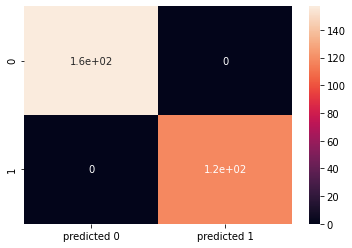

In [54]:
cm = metrics.confusion_matrix(y_test,multi_class_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### Comparing All the Algorithms

In [55]:
print("LogisticRegression: {0:.4f}%".format(accuracies.mean()*100))
print("\n")
print("Support Vector Machine: {0:.4f}%".format(svm_accuracies.mean()*100))
print("\n")
print("Random Forest: {0:.4f}%".format(rfc_accuracies.mean()*100))
print("\n")
print("KNN: {0:.4f}%".format(knn_accuracies.mean()*100))
print("\n")
print("Nueral Network: {}%".format(100))
print("\n")

LogisticRegression: 98.3586%


Support Vector Machine: 98.5405%


Random Forest: 99.2727%


KNN: 99.7273%


Nueral Network: 100%




### XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
xgbc = XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=142)

In [ ]:
xgbc.fit(X_train, y_train)

In [ ]:
print("XGBClassifier Train Score: ", xgbc.score(X_train, y_train))
print("XGBClassifier Test Score: ", xgbc.score(X_test, y_test))

In [59]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [120]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

In [123]:
# Model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('XGB', XGBClassifier()))
models.append(('XGB',xgbc()))

NameError: name 'xgbc' is not defined

In [68]:
 def model_selection(X_train, y_train):
    acc_result = []
    auc_result = []
    names = []

    col = ['Model', 'ROC AUC Mean','ROC AUC Std','ACC Mean', 'ACC Std']
    result = pd.DataFrame(columns = col)

    i=0
    for name, model in models:
        kfold = KFold(n_splits = 10, random_state = 7)
        cv_acc_result  = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
        cv_auc_result  = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'roc_auc')

        acc_result.append(cv_acc_result)
        auc_result.append(cv_auc_result)
        names.append(name)

        result.loc[i] = [name, 
                         cv_auc_result.mean(), 
                         cv_auc_result.std(),
                         cv_acc_result.mean(),
                         cv_acc_result.std()]

        result = result.sort_values('ROC AUC Mean', ascending = False)
        i+= 1

    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.boxplot(X = names, Y = auc_result)
    plt.title('ROC AUC Score')

    plt.subplot(1,2,2)
    sns.boxplot(X = names, Y = acc_result)
    plt.title('Accuracy Score')
    plt.show()

    return(result)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

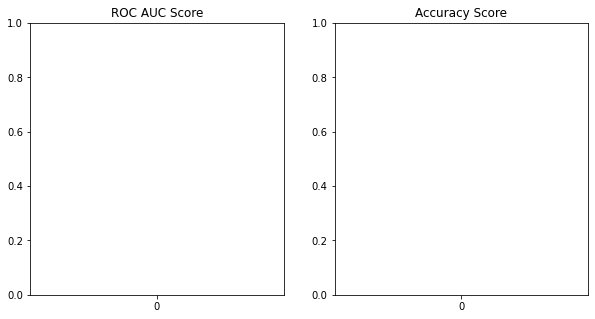

,Model,ROC AUC Mean,ROC AUC Std,ACC Mean,ACC Std
4,SVM,1.000000,0.000000,1.000000,0.000000
7,GB,0.999833,0.000268,0.995455,0.006098
5,RF,0.999735,0.000794,0.993628,0.005825
1,LDA,0.999659,0.000427,0.977198,0.009369
0,LR,0.999563,0.000367,0.982677,0.006395
3,KNN,0.999107,0.002679,0.998182,0.003636
6,ADA,0.998759,0.003211,0.994545,0.006030
2,CART,0.981674,0.009513,0.980851,0.011113


In [118]:
model_selection(X_train, y_train)

## Neural Network Classifier Model